In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
read_csv=pd.read_csv('C:/Users/dell/Desktop/DATA7901/Final_proposal/dataset_space_API_past_launches_raw.csv')
read_csv.dtypes

FlightNumber        int64
Date               object
BoosterVersion     object
PayloadMass       float64
Orbit              object
LaunchSite         object
Outcome            object
Flights             int64
GridFins             bool
Reused               bool
Legs                 bool
LandingPad         object
Block             float64
ReusedCount         int64
Serial             object
Longitude         float64
Latitude          float64
dtype: object

In [2]:
#Data wrangling
falcon9_data = read_csv[read_csv['BoosterVersion'] == 'Falcon 9']
mean_value=round(falcon9_data['PayloadMass'].mean(),2)
falcon9_data_new= falcon9_data.loc[:,'PayloadMass'].fillna(mean_value,inplace=True)
falcon9_data

D:\Program\Anaconda\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
4,6,2010-06-04,Falcon 9,6123.55,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857
5,8,2012-05-22,Falcon 9,525.00,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857
6,10,2013-03-01,Falcon 9,677.00,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857
7,11,2013-09-29,Falcon 9,500.00,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093
8,12,2013-12-03,Falcon 9,3170.00,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,102,2020-09-03,Falcon 9,15600.00,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1060,-80.603956,28.608058
90,103,2020-10-06,Falcon 9,15600.00,VLEO,KSC LC 39A,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1058,-80.603956,28.608058
91,104,2020-10-18,Falcon 9,15600.00,VLEO,KSC LC 39A,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1051,-80.603956,28.608058
92,105,2020-10-24,Falcon 9,15600.00,VLEO,CCSFS SLC 40,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,12,B1060,-80.577366,28.561857


In [4]:
# the number and occurrence of each orbit
df1=falcon9_data.groupby(['BoosterVersion','Orbit'])['Orbit'].count().sort_values(ascending=False)
print(df1)
#the number and occurrence of mission outcome per orbit type
df2=falcon9_data.groupby(['Orbit','Outcome'])['Outcome'].count().reset_index(name='Count').sort_values(['Orbit','Count'], ascending=False)
print(df2)

BoosterVersion  Orbit
Falcon 9        GTO      27
                ISS      21
                VLEO     14
                PO        9
                LEO       7
                SSO       5
                MEO       3
                ES-L1     1
                GEO       1
                HEO       1
                SO        1
Name: Orbit, dtype: int64
    Orbit      Outcome  Count
30   VLEO    True ASDS     12
29   VLEO   False ASDS      2
28    SSO    True RTLS      3
27    SSO    True ASDS      2
26     SO    None None      1
24     PO    True ASDS      5
21     PO   False ASDS      1
22     PO  False Ocean      1
23     PO    None None      1
25     PO   True Ocean      1
20    MEO    True ASDS      2
19    MEO    None None      1
18    LEO    True RTLS      4
16    LEO    None None      2
17    LEO   True Ocean      1
15    ISS    True RTLS      7
13    ISS    True ASDS      5
12    ISS    None None      3
8     ISS   False ASDS      2
9     ISS  False Ocean      1
10    ISS   Fa

In [5]:
#Classfiy successful landing and fail landing
falcon9_data['Outcome'].astype(str)
landing_status=[]
for row in falcon9_data['Outcome']:
        if row in ("True Ocean", "True RTLS","True ASDS"):landing_status.append("Success")
        elif row in ('False Ocean','False RTLS','False ASDS','None ASDS','None None'):landing_status.append("Fail")
        else: landing_status.append("No Rating")
falcon9_data['LandingStatus'] = landing_status
falcon9_data['LandingStatus'].astype(str)
falcon9_data

C:\Users\dell\AppData\Local\Temp/ipykernel_7604/712157466.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  falcon9_data['LandingStatus'] = landing_status


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,LandingStatus
4,6,2010-06-04,Falcon 9,6123.55,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,Fail
5,8,2012-05-22,Falcon 9,525.00,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,Fail
6,10,2013-03-01,Falcon 9,677.00,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,Fail
7,11,2013-09-29,Falcon 9,500.00,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,Fail
8,12,2013-12-03,Falcon 9,3170.00,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,Fail
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,102,2020-09-03,Falcon 9,15600.00,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1060,-80.603956,28.608058,Success
90,103,2020-10-06,Falcon 9,15600.00,VLEO,KSC LC 39A,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1058,-80.603956,28.608058,Success
91,104,2020-10-18,Falcon 9,15600.00,VLEO,KSC LC 39A,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1051,-80.603956,28.608058,Success
92,105,2020-10-24,Falcon 9,15600.00,VLEO,CCSFS SLC 40,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,12,B1060,-80.577366,28.561857,Success


In [6]:
#Success and fail launch
df3=falcon9_data.groupby(['BoosterVersion','LandingStatus'])['LandingStatus'].count()
print(df3)
#The number of Each orbit's successful and fail landing 
df4=falcon9_data.groupby(['Orbit','LandingStatus'])['LandingStatus'].count().reset_index(name='Count').sort_values(['Orbit','Count'], ascending=False)
print(df4)

BoosterVersion  LandingStatus
Falcon 9        Fail             30
                Success          60
Name: LandingStatus, dtype: int64
    Orbit LandingStatus  Count
16   VLEO       Success     12
15   VLEO          Fail      2
14    SSO       Success      5
13     SO          Fail      1
12     PO       Success      6
11     PO          Fail      3
10    MEO       Success      2
9     MEO          Fail      1
8     LEO       Success      5
7     LEO          Fail      2
6     ISS       Success     13
5     ISS          Fail      8
4     HEO       Success      1
3     GTO       Success     14
2     GTO          Fail     13
1     GEO       Success      1
0   ES-L1       Success      1


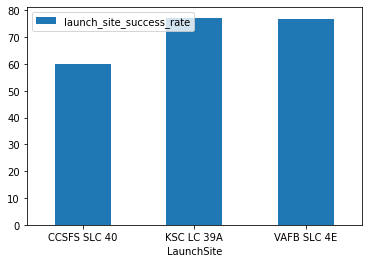

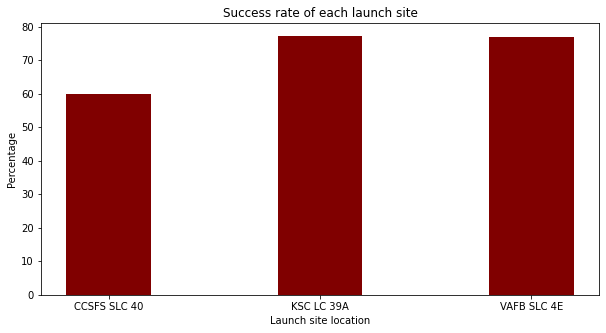

,LaunchSite,LandingStatus,Count,LaunchSiteSumAttempt,TotalAttempt,launch_site_success_rate,Total_Success_rate
1,CCSFS SLC 40,Success,33,55,90,60.00,36.67
3,KSC LC 39A,Success,17,22,90,77.27,18.89
5,VAFB SLC 4E,Success,10,13,90,76.92,11.11


In [7]:
#The launch site has most launch attempts or highest success rate.
launch_site=falcon9_data.groupby(['LaunchSite','LandingStatus'])['LandingStatus'].count().reset_index(name='Count')
launch_site['LaunchSiteSumAttempt']=launch_site.groupby('LaunchSite')['Count'].transform(np.sum)
launch_site['TotalAttempt']=launch_site['Count'].sum()
launch_site['launch_site_success_rate']=round(launch_site['Count']/launch_site['LaunchSiteSumAttempt'],4)*100
launch_site['Total_Success_rate']=round(launch_site['Count']/launch_site['TotalAttempt'],4)*100
final_result=launch_site.loc[launch_site['LandingStatus']=="Success"]

ax = final_result.plot.bar(x='LaunchSite', y='launch_site_success_rate', rot=0)
final_result.to_excel("output.xlsx",sheet_name='Sheet_name_1')  

Launchsite=launch_site['LaunchSite']
success_rate_result=launch_site['launch_site_success_rate']
fig = plt.figure(figsize = (10, 5))
plt.bar(Launchsite, success_rate_result, color ='maroon',
        width = 0.4)

plt.xlabel("Launch site location")
plt.ylabel("Percentage")
plt.title("Success rate of each launch site")
plt.show()
final_result

In [8]:
#The range of payload mass a launch site can be used for.
payload_mass_data=falcon9_data
print(payload_mass_data)

    FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
4              6  2010-06-04       Falcon 9      6123.55   LEO  CCSFS SLC 40   
5              8  2012-05-22       Falcon 9       525.00   LEO  CCSFS SLC 40   
6             10  2013-03-01       Falcon 9       677.00   ISS  CCSFS SLC 40   
7             11  2013-09-29       Falcon 9       500.00    PO   VAFB SLC 4E   
8             12  2013-12-03       Falcon 9      3170.00   GTO  CCSFS SLC 40   
..           ...         ...            ...          ...   ...           ...   
89           102  2020-09-03       Falcon 9     15600.00  VLEO    KSC LC 39A   
90           103  2020-10-06       Falcon 9     15600.00  VLEO    KSC LC 39A   
91           104  2020-10-18       Falcon 9     15600.00  VLEO    KSC LC 39A   
92           105  2020-10-24       Falcon 9     15600.00  VLEO  CCSFS SLC 40   
93           106  2020-11-05       Falcon 9      3681.00   MEO  CCSFS SLC 40   

        Outcome  Flights  GridFins  Reu

In [9]:
payload_range=[
    (payload_mass_data['PayloadMass'] >=0 )& (payload_mass_data['PayloadMass']  <=3000),
    (payload_mass_data['PayloadMass'] >3000) & (payload_mass_data['PayloadMass']  <=6000),
    (payload_mass_data['PayloadMass'] >6000) & (payload_mass_data['PayloadMass']  <=9000),
    (payload_mass_data['PayloadMass'] >9000) & (payload_mass_data['PayloadMass']  <=12000),
    (payload_mass_data['PayloadMass'] >12000) & (payload_mass_data['PayloadMass']  <=15000),
    (payload_mass_data['PayloadMass'] >15000) &(payload_mass_data['PayloadMass']  <=18000),
    (payload_mass_data['PayloadMass'] >18000)
]

label_range=['0-3000','3000-6000','6000-9000','9000-12000','12000-15000','15000-18000','18000+']
payload_mass_data['payload_range'] = np.select(payload_range, label_range)
payload_mass_data
payload_mass_data.to_csv(r'C:\Users\dell\Desktop\DATA7901\Final_proposal\pay_load_mass_data.csv', index=False)

C:\Users\dell\AppData\Local\Temp/ipykernel_7604/2170305132.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  payload_mass_data['payload_range'] = np.select(payload_range, label_range)


In [10]:
#The range of payload mass a launch site can be used for.
df5=payload_mass_data.groupby(['LaunchSite','payload_range','LandingStatus'])['payload_range'].count().reset_index(name='Count')
df5['LaunchSiteSumAttempt']=df5.groupby('LaunchSite')['Count'].transform(np.sum)
df5['Rate']=round(df5['Count']/df5['LaunchSiteSumAttempt'],4)*100
#success payload_range
df5=df5.sort_values(by=['LaunchSite','Count'], ascending=False)
print(df5)
df5.to_csv(r'C:\Users\dell\Desktop\DATA7901\Final_proposal\pay_load_mass_data1.csv', index=False)

#The range of payload mass a launch site can be used for.
df6=payload_mass_data.groupby(['payload_range','LandingStatus'])['payload_range'].count().reset_index(name='Count')
df6
df6['SumAttempt']=df6.groupby('payload_range')['Count'].transform(np.sum)
df6['Rate']=round(df6['Count']/df6['SumAttempt'],4)*100
#success payload_range
df6=df6.sort_values(by=['payload_range','Count'], ascending=False)
print(df6)
df6.to_csv(r'C:\Users\dell\Desktop\DATA7901\Final_proposal\pay_load_mass_data2.csv', index=False)


      LaunchSite payload_range LandingStatus  Count  LaunchSiteSumAttempt  \
22   VAFB SLC 4E    9000-12000       Success      6                    13   
19   VAFB SLC 4E        0-3000       Success      3                    13   
18   VAFB SLC 4E        0-3000          Fail      2                    13   
20   VAFB SLC 4E     3000-6000       Success      1                    13   
21   VAFB SLC 4E    9000-12000          Fail      1                    13   
14    KSC LC 39A     3000-6000       Success      6                    22   
9     KSC LC 39A        0-3000       Success      4                    22   
12    KSC LC 39A   15000-18000       Success      4                    22   
15    KSC LC 39A     6000-9000          Fail      3                    22   
10    KSC LC 39A   12000-15000       Success      1                    22   
11    KSC LC 39A   15000-18000          Fail      1                    22   
13    KSC LC 39A     3000-6000          Fail      1                    22   

In [11]:
#fail payload range
df7=df5.loc[df5['LandingStatus']=='Fail']
df7=df7.sort_values(by=['LaunchSite', 'Count'], ascending=False)
print(df7)

      LaunchSite payload_range LandingStatus  Count  LaunchSiteSumAttempt  \
18   VAFB SLC 4E        0-3000          Fail      2                    13   
21   VAFB SLC 4E    9000-12000          Fail      1                    13   
15    KSC LC 39A     6000-9000          Fail      3                    22   
11    KSC LC 39A   15000-18000          Fail      1                    22   
13    KSC LC 39A     3000-6000          Fail      1                    22   
0   CCSFS SLC 40        0-3000          Fail      9                    55   
5   CCSFS SLC 40     3000-6000          Fail      9                    55   
7   CCSFS SLC 40     6000-9000          Fail      3                    55   
3   CCSFS SLC 40   15000-18000          Fail      1                    55   

     Rate  
18  15.38  
21   7.69  
15  13.64  
11   4.55  
13   4.55  
0   16.36  
5   16.36  
7    5.45  
3    1.82  


In [12]:
#The orbits have the highest/lowest rate. 
orbits_data=falcon9_data
orbits_result=orbits_data.groupby(['Orbit','LandingStatus'])['LandingStatus'].count().reset_index(name='Count')
print(orbits_result.sort_values(by=['Orbit','Count'], ascending=False))

    Orbit LandingStatus  Count
16   VLEO       Success     12
15   VLEO          Fail      2
14    SSO       Success      5
13     SO          Fail      1
12     PO       Success      6
11     PO          Fail      3
10    MEO       Success      2
9     MEO          Fail      1
8     LEO       Success      5
7     LEO          Fail      2
6     ISS       Success     13
5     ISS          Fail      8
4     HEO       Success      1
3     GTO       Success     14
2     GTO          Fail     13
1     GEO       Success      1
0   ES-L1       Success      1


In [13]:
#The orbits have the highest/lowest rate
orbits_result['OrbitAttempt']=orbits_result.groupby('Orbit')['Count'].transform(np.sum)
orbits_result['Rate']=round(orbits_result['Count']/orbits_result['OrbitAttempt'],4)*100
#Highest/lowest success rate
orbits_result_success=orbits_result.loc[orbits_result['LandingStatus']=='Success']
#print(orbits_result_success.sort_values(by=['Rate'], ascending=False))
orbits_result_success.sort_values(by=['Rate'], ascending=False)

,Orbit,LandingStatus,Count,OrbitAttempt,Rate
0,ES-L1,Success,1,1,100.00
1,GEO,Success,1,1,100.00
4,HEO,Success,1,1,100.00
14,SSO,Success,5,5,100.00
16,VLEO,Success,12,14,85.71
8,LEO,Success,5,7,71.43
10,MEO,Success,2,3,66.67
12,PO,Success,6,9,66.67
6,ISS,Success,13,21,61.90
3,GTO,Success,14,27,51.85


In [14]:
#Highest/lowest fail rate
orbits_result_fail=orbits_result.loc[orbits_result['LandingStatus']=='Fail']
print(orbits_result_fail.sort_values(by=['Rate'], ascending=False))

   Orbit LandingStatus  Count  OrbitAttempt    Rate
13    SO          Fail      1             1  100.00
2    GTO          Fail     13            27   48.15
5    ISS          Fail      8            21   38.10
9    MEO          Fail      1             3   33.33
11    PO          Fail      3             9   33.33
7    LEO          Fail      2             7   28.57
15  VLEO          Fail      2            14   14.29


In [15]:
#The success rate of payload range for each orbits.
orbit_payload_mass_data=payload_mass_data.loc[payload_mass_data['LandingStatus']=='Success']
data2=orbit_payload_mass_data.groupby(['Orbit','payload_range','LandingStatus'])['payload_range'].count().reset_index(name='Count')
data2['OrbitSumAttempt']=data2.groupby('Orbit')['Count'].transform(np.sum)
data2['SuccessRate']=round(data2['Count']/data2['OrbitSumAttempt'],4)*100
print()
data2.sort_values(by=['Orbit','payload_range'], ascending=True)
#print(data2['OrbitSumAttempt'])

,Orbit,payload_range,LandingStatus,Count,OrbitSumAttempt,SuccessRate
0,ES-L1,0-3000,Success,1,1,100.00
1,GEO,6000-9000,Success,1,1,100.00
2,GTO,0-3000,Success,1,14,7.14
3,GTO,3000-6000,Success,10,14,71.43
4,GTO,6000-9000,Success,3,14,21.43
5,HEO,0-3000,Success,1,1,100.00
6,ISS,0-3000,Success,9,13,69.23
7,ISS,12000-15000,Success,1,13,7.69
8,ISS,3000-6000,Success,2,13,15.38
9,ISS,9000-12000,Success,1,13,7.69


In [16]:
# Any relationship between the successful landing and the flight number.
#success_data=falcon9_data.loc[falcon9_data['LandingStatus']=='Success']
success_data=falcon9_data
success_data

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,LandingStatus,payload_range
4,6,2010-06-04,Falcon 9,6123.55,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,Fail,6000-9000
5,8,2012-05-22,Falcon 9,525.00,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,Fail,0-3000
6,10,2013-03-01,Falcon 9,677.00,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,Fail,0-3000
7,11,2013-09-29,Falcon 9,500.00,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,Fail,0-3000
8,12,2013-12-03,Falcon 9,3170.00,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,Fail,3000-6000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,102,2020-09-03,Falcon 9,15600.00,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1060,-80.603956,28.608058,Success,15000-18000
90,103,2020-10-06,Falcon 9,15600.00,VLEO,KSC LC 39A,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1058,-80.603956,28.608058,Success,15000-18000
91,104,2020-10-18,Falcon 9,15600.00,VLEO,KSC LC 39A,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1051,-80.603956,28.608058,Success,15000-18000
92,105,2020-10-24,Falcon 9,15600.00,VLEO,CCSFS SLC 40,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,12,B1060,-80.577366,28.561857,Success,15000-18000


In [17]:
#See the success is related to the flights
flight_data=success_data.groupby(['Flights','LandingStatus'])['Flights'].count()
flight_data


Flights  LandingStatus
1        Fail             22
         Success          31
2        Fail              4
         Success          15
3        Fail              1
         Success           7
4        Fail              2
         Success           4
5        Fail              1
         Success           1
6        Success           2
Name: Flights, dtype: int64

In [18]:
#see the success is related to the blcok
block_data=success_data.groupby(['Block','LandingStatus'])['Block'].count()
block_data

Block  LandingStatus
1.0    Fail             15
       Success           4
2.0    Success           6
3.0    Fail              4
       Success          11
4.0    Fail              5
       Success           6
5.0    Fail              6
       Success          33
Name: Block, dtype: int64

In [19]:
#See the success is related to the GridFins
flight_data2=success_data.groupby(['GridFins','LandingStatus'])['GridFins'].count()
print(flight_data2)

GridFins  LandingStatus
False     Fail             18
          Success           2
True      Fail             12
          Success          58
Name: GridFins, dtype: int64


In [20]:
#See the success is related to the Reused,legs
flight_data3=success_data.groupby(['Reused','LandingStatus'])['Reused'].count()
print(flight_data3)

flight_data4=success_data.groupby(['Legs','LandingStatus'])['Legs'].count()
print(flight_data4)

Reused  LandingStatus
False   Fail             22
        Success          31
True    Fail              8
        Success          29
Name: Reused, dtype: int64
Legs   LandingStatus
False  Fail             18
       Success           1
True   Fail             12
       Success          59
Name: Legs, dtype: int64


In [21]:
#See the success is related to the Reused,legs
df1=success_data.loc[success_data['Reused']==False]
flight_data5=df1.groupby(['LandingStatus','Reused','Legs'])['FlightNumber'].count()
df2=success_data.loc[success_data['Reused']==True]
flight_data6=df2.groupby(['LandingStatus','Reused','Legs'])['FlightNumber'].count()
print(flight_data5)
print(flight_data6)
#See the success is related to the Reused,GridFins
df1=success_data.loc[success_data['Reused']==False]
flight_data7=df1.groupby(['LandingStatus','Reused','GridFins'])['FlightNumber'].count()
df2=success_data.loc[success_data['Reused']==True]
flight_data8=df2.groupby(['LandingStatus','Reused','GridFins'])['FlightNumber'].count()
print(flight_data7)
print(flight_data8)
#Conclusion: The success landing is consist of grid fins and legs, legs and gridfins is 100% success factors
df0=success_data.loc[(success_data['Legs']==True)&(success_data['GridFins']==True)]
df_data=df0.groupby(['LandingStatus','Reused'])['FlightNumber'].count()
print(df_data)

LandingStatus  Reused  Legs 
Fail           False   False    14
                       True      8
Success        False   True     31
Name: FlightNumber, dtype: int64
LandingStatus  Reused  Legs 
Fail           True    False     4
                       True      4
Success        True    False     1
                       True     28
Name: FlightNumber, dtype: int64
LandingStatus  Reused  GridFins
Fail           False   False       14
                       True         8
Success        False   False        2
                       True        29
Name: FlightNumber, dtype: int64
LandingStatus  Reused  GridFins
Fail           True    False        4
                       True         4
Success        True    True        29
Name: FlightNumber, dtype: int64
LandingStatus  Reused
Fail           False      8
               True       4
Success        False     29
               True      28
Name: FlightNumber, dtype: int64


In [22]:
#see the success is related to the blcok
reused_data=success_data.groupby(['ReusedCount','LandingStatus'])['ReusedCount'].count()
print(reused_data)

ReusedCount  LandingStatus
0            Fail             22
             Success           7
1            Fail              4
             Success          20
2            Fail              1
             Success           2
3            Fail              2
             Success           6
4            Fail              1
             Success           3
5            Success           4
7            Success           1
9            Success           6
12           Success          11
Name: ReusedCount, dtype: int64


In [23]:
#If the success rate keeps increasing each year
falcon9_data['Year']= pd.DatetimeIndex(falcon9_data['Date']).year
successrate_of_year=falcon9_data
success_rate=successrate_of_year.groupby(['Year','LandingStatus'])['LandingStatus'].count().reset_index(name='LandingCount')
success_rate['TotalAttemptoftheYear']=success_rate.groupby(['Year'])['LandingCount'].transform(np.sum)
success_rate['SuccessRate']=round(success_rate['LandingCount']/success_rate['TotalAttemptoftheYear'],4)*100
final_success=success_rate.loc[success_rate['LandingStatus']=='Success']
print(final_success.sort_values(by=['Year','SuccessRate'], ascending=True))

    Year LandingStatus  LandingCount  TotalAttemptoftheYear  SuccessRate
4   2014       Success             2                      6        33.33
6   2015       Success             2                      6        33.33
8   2016       Success             5                      8        62.50
10  2017       Success            15                     18        83.33
12  2018       Success            11                     18        61.11
14  2019       Success             9                     10        90.00
16  2020       Success            16                     19        84.21


C:\Users\dell\AppData\Local\Temp/ipykernel_7604/3744471544.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  falcon9_data['Year']= pd.DatetimeIndex(falcon9_data['Date']).year
